In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib==3.7.3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('compVsnifty.csv')
df=df.dropna()
df_new=df.drop(['Close'],axis=1)

<Axes: >

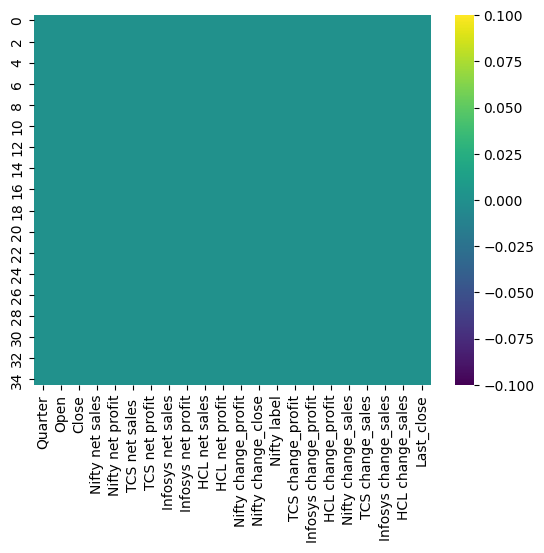

In [3]:
sns.heatmap(df.isnull(),cmap='viridis')

In [4]:
df_new.head()

,Quarter,Open,Nifty net sales,Nifty net profit,TCS net sales,TCS net profit,Infosys net sales,Infosys net profit,HCL net sales,HCL net profit,...,Nifty change_close,Nifty label,TCS change_profit,Infosys change_profit,HCL change_profit,Nifty change_sales,TCS change_sales,Infosys change_sales,HCL change_sales,Last_close
0,Dec-15,11120.83,8626165.33,890.69,21621,5991,13562,3163,4471.85,1649.66,...,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11118.86
1,Mar-16,10901.89,13640220.26,1225.26,22258,5728,14158,3391,4612.64,1671.51,...,-2.04,-1,-4.39,7.21,1.32,58.13,2.95,4.39,3.15,11118.86
2,Jun-16,11233.45,12083445.94,1158.64,23087,5778,14420,3180,4608.80,1799.29,...,3.13,1,0.87,-6.22,7.64,-11.41,3.72,1.85,-0.08,10892.00
3,Sep-16,10769.15,13051316.13,1185.47,23016,5958,15000,3476,4705.77,1690.72,...,-4.31,-1,3.12,9.31,-6.03,8.01,-0.31,4.02,2.10,11232.51
4,Dec-16,10033.53,13081942.31,1050.86,23184,6084,14949,3599,4889.26,1661.54,...,-6.68,-1,2.11,3.54,-1.73,0.23,0.73,-0.34,3.90,10748.72


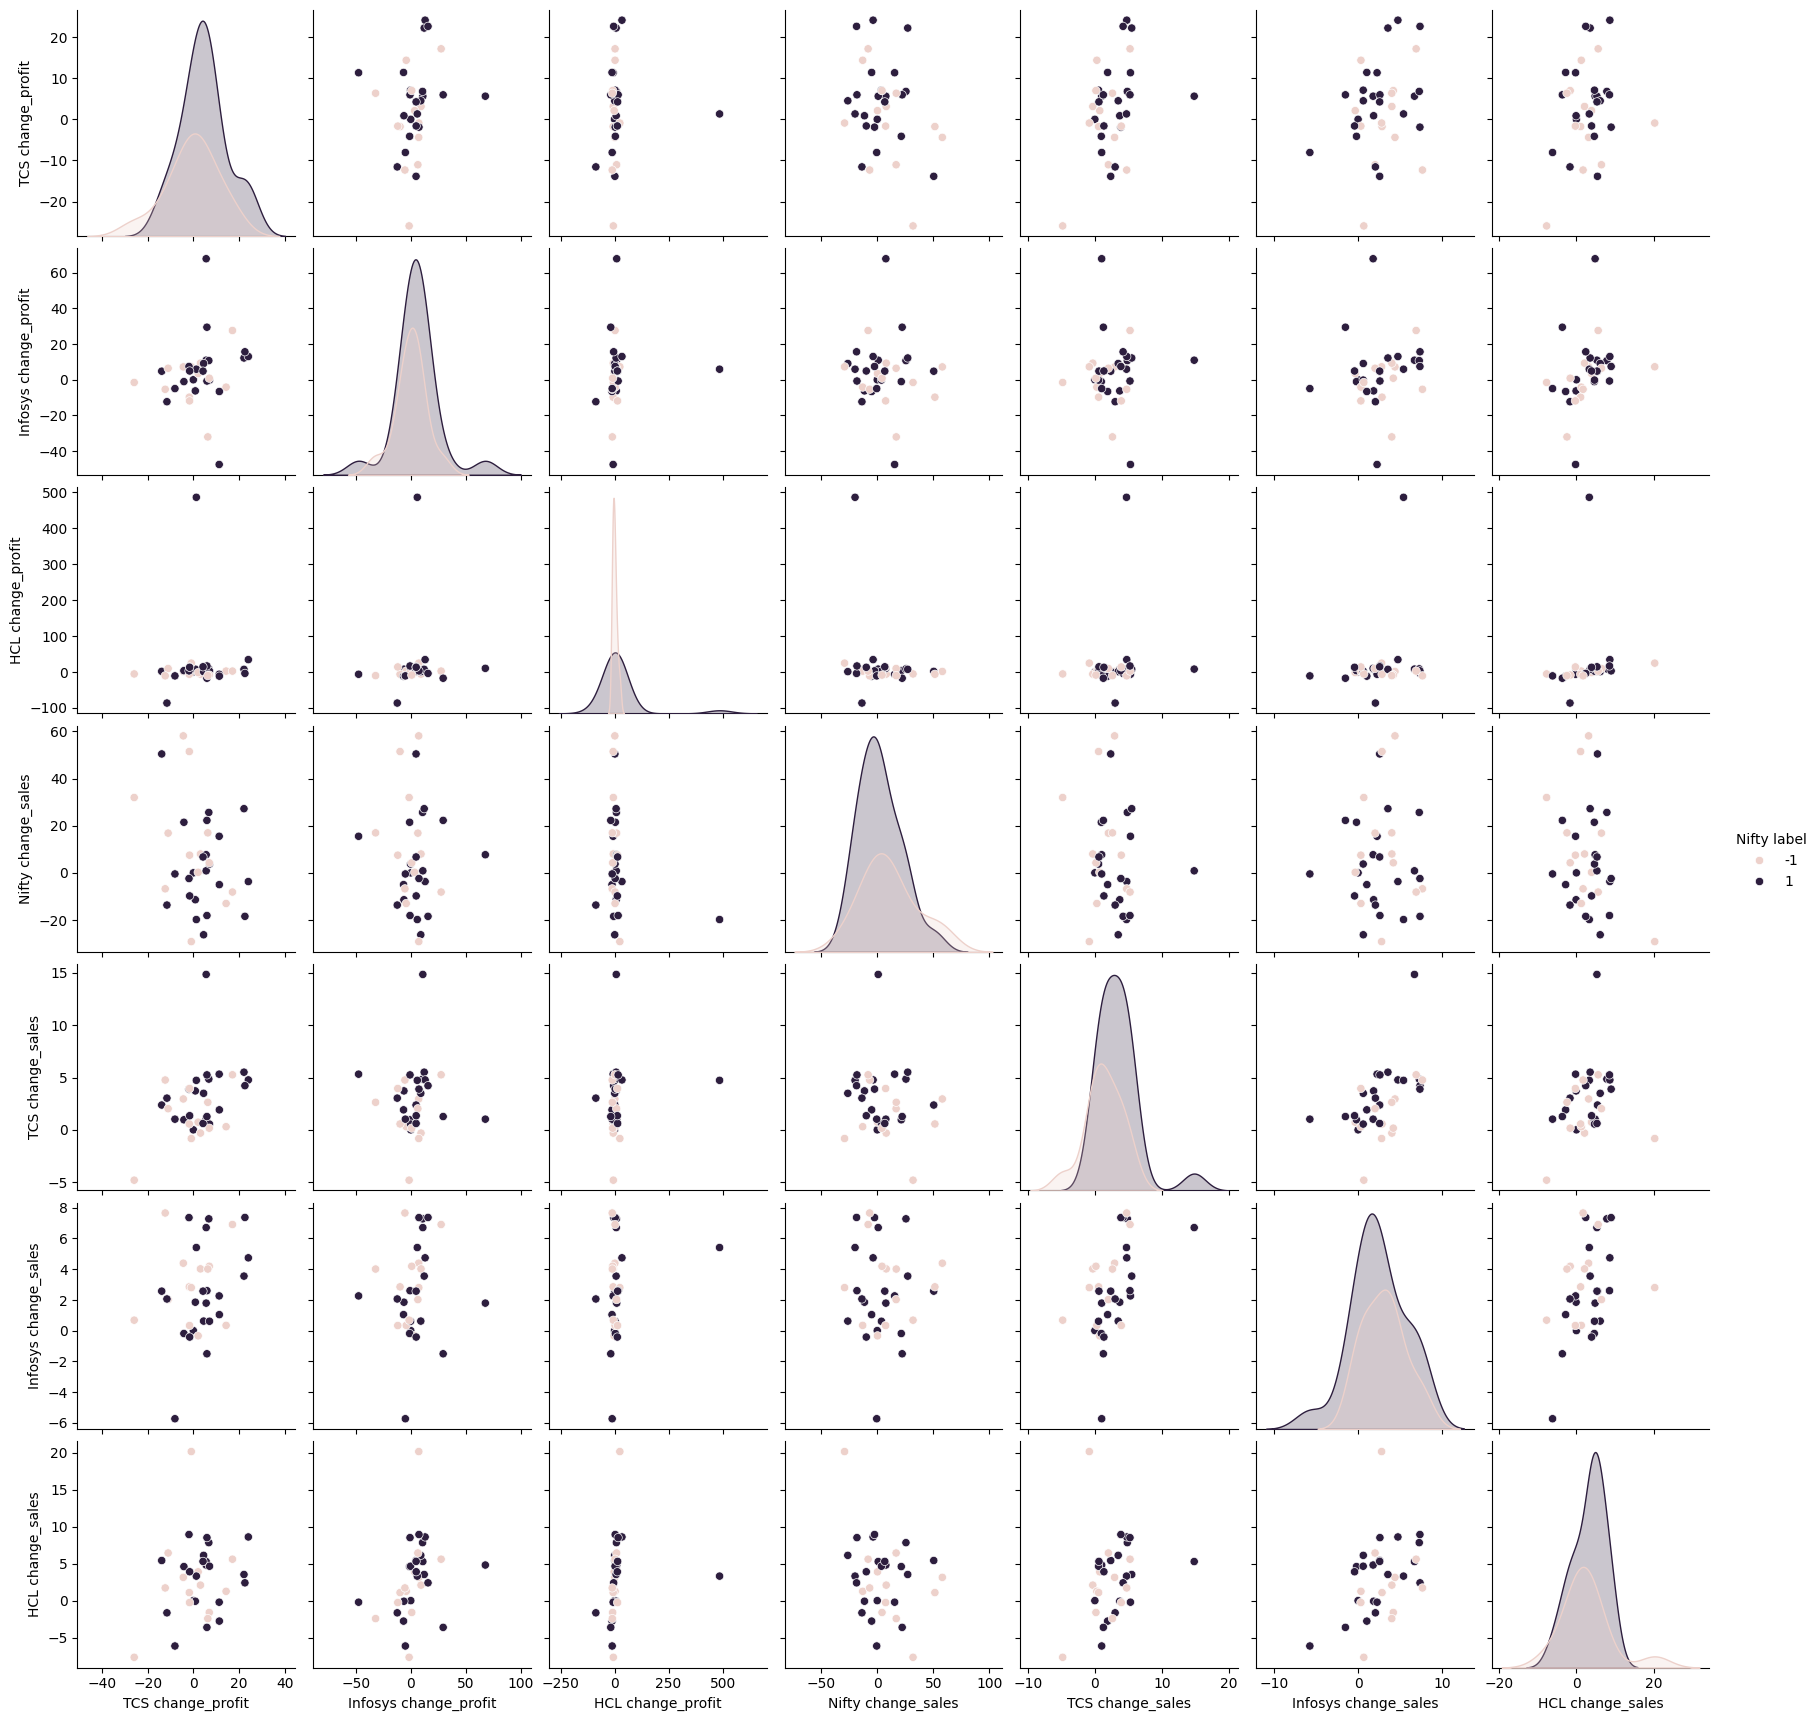

In [15]:
plt.rcParams['figure.figsize']=(8,8)
#sns.pairplot(df,hue='Nifty label', vars=['Open','Close','Nifty net sales','Nifty net profit','TCS net sales ','TCS net profit',
#                                   'Infosys net sales','Infosys net profit','HCL net sales','HCL net profit','Nifty change_profit',
#                                   'Nifty change_close','TCS change_profit','Infosys change_profit','HCL change_profit',
#                                   'Nifty change_sales','TCS change_sales','Infosys change_sales','HCL change_sales'])
sns.pairplot(df,hue='Nifty label', vars=['TCS change_profit','Infosys change_profit','HCL change_profit',
                                    'Nifty change_sales','TCS change_sales','Infosys change_sales','HCL change_sales'])
plt.savefig('/Users/ayushmohite/Downloads/3.jpg')

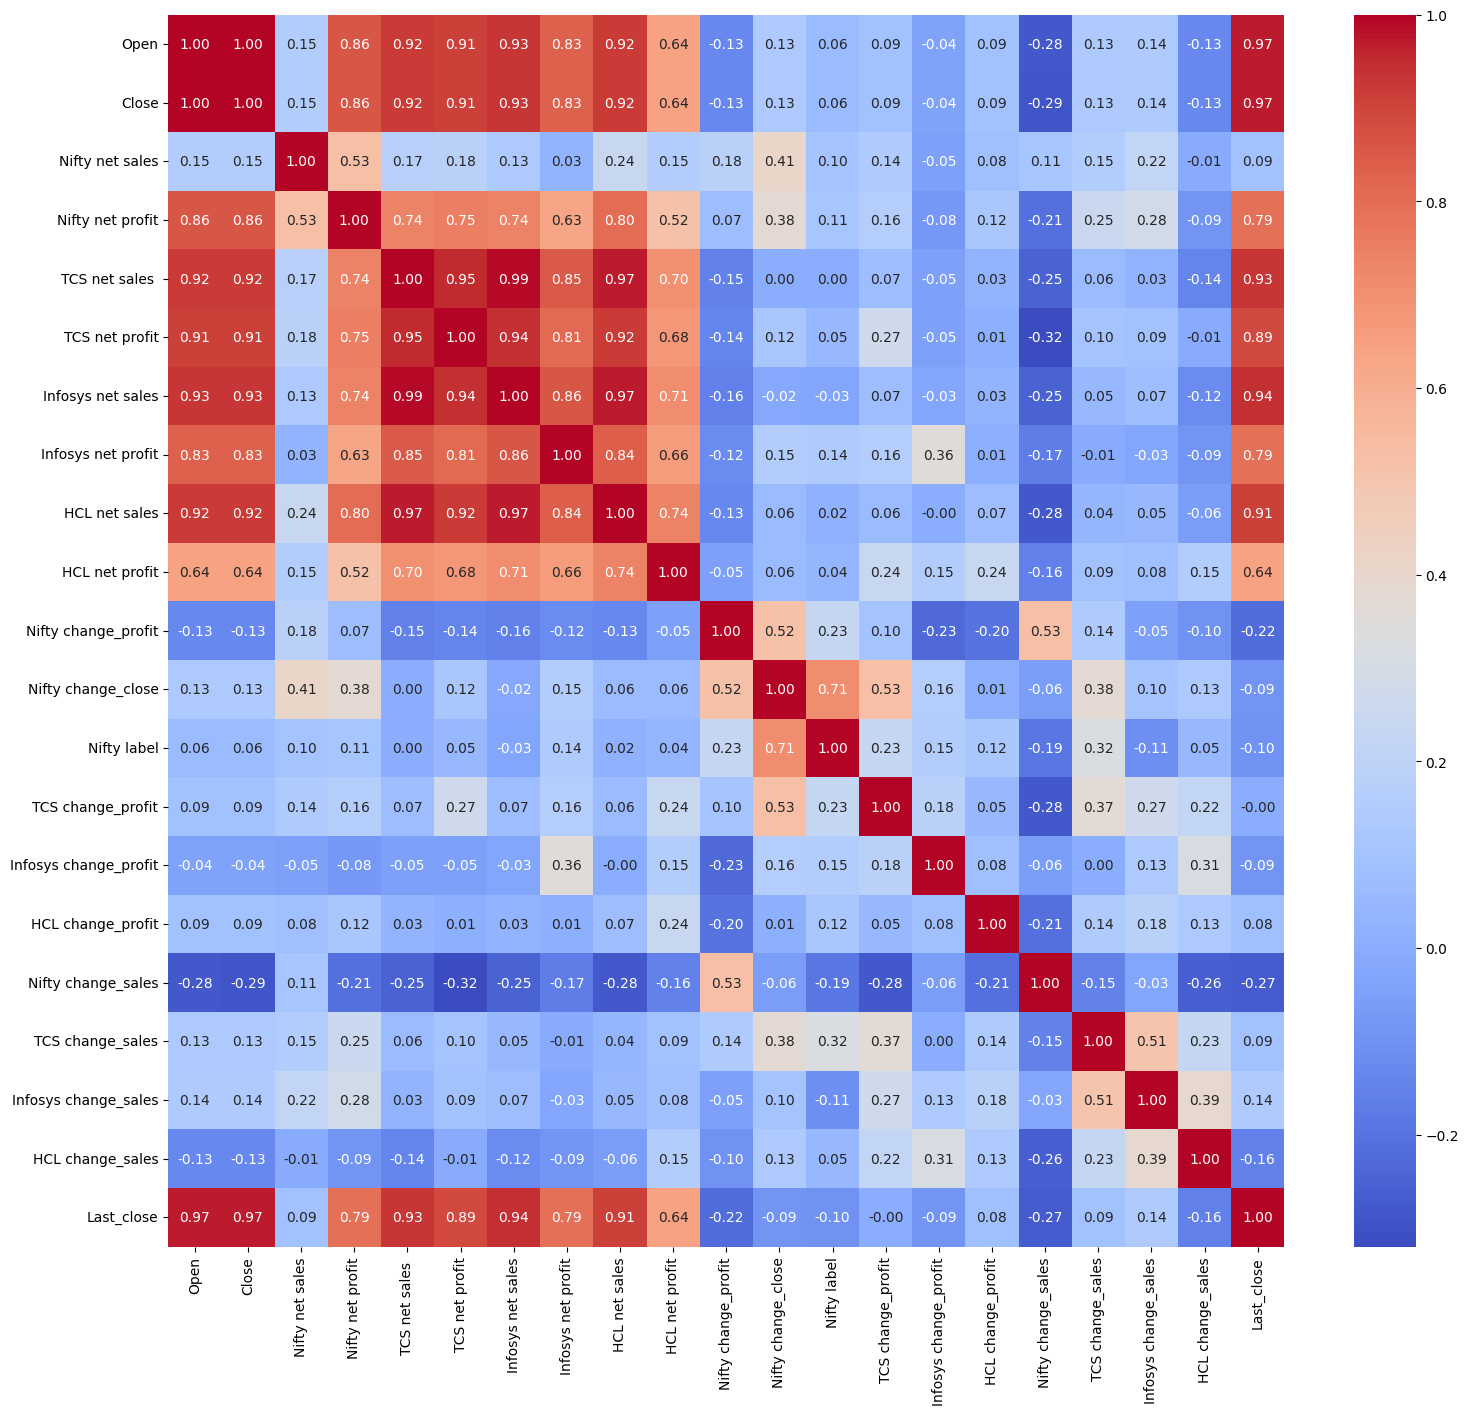

<Figure size 800x800 with 0 Axes>

In [25]:
new_df=df.drop('Quarter',axis=1)
corr = new_df.corr()
# Round the correlation matrix to 2 decimal places
corr_matrix_rounded = corr.round(2)

# Plotting the rounded correlation matrix
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix_rounded, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
plt.savefig('heatmap_comVsnifty.jpg')

In [37]:
new_df=df.drop(['Quarter','Open','Close','Nifty net sales','Nifty net profit','TCS net sales ','TCS net profit',
                                   'Infosys net sales','HCL net sales','HCL net profit','HCL change_sales','Nifty label'],axis=1)

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
y = df['Nifty label'].replace({-1: 0, 1: 1})
X = new_df
# Assuming `y` is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = xgboost_model.predict(X_test)
y_pred_proba = xgboost_model.predict_proba(X_test)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:48:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xg)
print(f'Accuracy: {accuracy}')

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss}')


Accuracy: 1.0
Log Loss: 0.06511992429378446


In [47]:
import pickle
# Save the model using pickle
with open('xgboost_model_compVsnifty.pkl', 'wb') as f:
    pickle.dump(xgboost_model, f)


In [49]:
positive_in_both = ((df['Nifty change_close'] > 0) & (df['HCL change_profit'] > 0)).sum()

negative_in_both = ((df['Nifty change_close'] < 0) & (df['HCL change_profit'] < 0)).sum()

total=positive_in_both + negative_in_both

print(f"Positive in both columns: {total}")
print(f'no.when both are both are opposite: {1196-total}')

#62% TCS up/down nifty up/down
#54% infy up/down nifty up/down
#62% hcl up/down nifty up/down

Positive in both columns: 22
no.when both are both are opposite: 1174


In [53]:
new_df

,Infosys net profit,Nifty change_profit,Nifty change_close,TCS change_profit,Infosys change_profit,HCL change_profit,Nifty change_sales,TCS change_sales,Infosys change_sales,Last_close
0,3163,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11118.86
1,3391,37.56,-2.04,-4.39,7.21,1.32,58.13,2.95,4.39,11118.86
2,3180,-5.44,3.13,0.87,-6.22,7.64,-11.41,3.72,1.85,10892.00
3,3476,2.32,-4.31,3.12,9.31,-6.03,8.01,-0.31,4.02,11232.51
4,3599,-11.35,-6.68,2.11,3.54,-1.73,0.23,0.73,-0.34,10748.72
5,3562,26.61,4.26,-4.13,-1.03,3.59,21.46,0.96,-0.19,10031.09
6,3415,-15.32,-1.31,14.35,-4.13,2.37,-13.00,0.30,0.34,10458.00
7,3579,27.90,2.13,-13.85,4.80,1.59,50.46,2.37,2.57,10320.91
8,6004,-16.67,5.14,5.62,67.76,10.00,7.69,1.02,1.79,10540.58
9,3157,66.19,13.10,11.32,-47.42,-6.50,15.52,5.32,2.26,11082.76


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 26 to 21
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Infosys net profit     4 non-null      int64  
 1   Nifty change_profit    4 non-null      float64
 2   Nifty change_close     4 non-null      float64
 3   TCS change_profit      4 non-null      float64
 4   Infosys change_profit  4 non-null      float64
 5   HCL change_profit      4 non-null      float64
 6   Nifty change_sales     4 non-null      float64
 7   TCS change_sales       4 non-null      float64
 8   Infosys change_sales   4 non-null      float64
 9   Last_close             4 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 352.0 bytes


AttributeError: 'int' object has no attribute 'info'